# Discrete Dynamical Systems

In this notebook we will run some simple simulations for **discrete dyanamical
systems** of interests, starting from a _linear birth_ model, ending up with a
_resource-consumer_ model, involving **non linearity** and **interactions**.

For the simulations it will be used a simple self-made library called `simulate`
that contains all the main routines.


In [1]:
import matplotlib.pyplot as plt
import simulate.discrete as sd

## Linear Birth

One of the simplest dynamical system model is the **linear birth** model that
provides a simple formula to simulate the growth of a population by a given
factor.

The full formula involves 3 main components:

- $\lambda$: the number of offsprings generated by every individual every
  $\sigma$ time unit.
- $\sigma$: the number of time units after an individual generates an offspring.
- $\Delta t$ is the time step.

All put together, the final formula is

$$N(t + \Delta t) = N(t) + \lambda \frac{\Delta t}{\sigma} N(t)$$

where $\frac{\Delta t}{\sigma}$ describes the number of _birth moments_ for
every individual in the interval $[t, t + \Delta t)$. Equation that can be
rewritten as follows:

$$N(t + \Delta t) = \left( 1 + \lambda \frac{\Delta t}{\sigma} \right) N(t)$$

It is also possible to group $\left( 1 + \lambda \frac{\Delta t}{\sigma} \right)$
into $r_d$, that takes the name of system's **birth rate**, so that we have

$$N_{t+1} = r_d \cdot N_t$$

that is more simple and clear.


In [ ]:
def linear_birth(n0, rate):
    n0 = n0[0]
    rate = rate[0]
    return rate * n0,

Let's now run some simulations with different initial population densities and
different values for the birth rate.


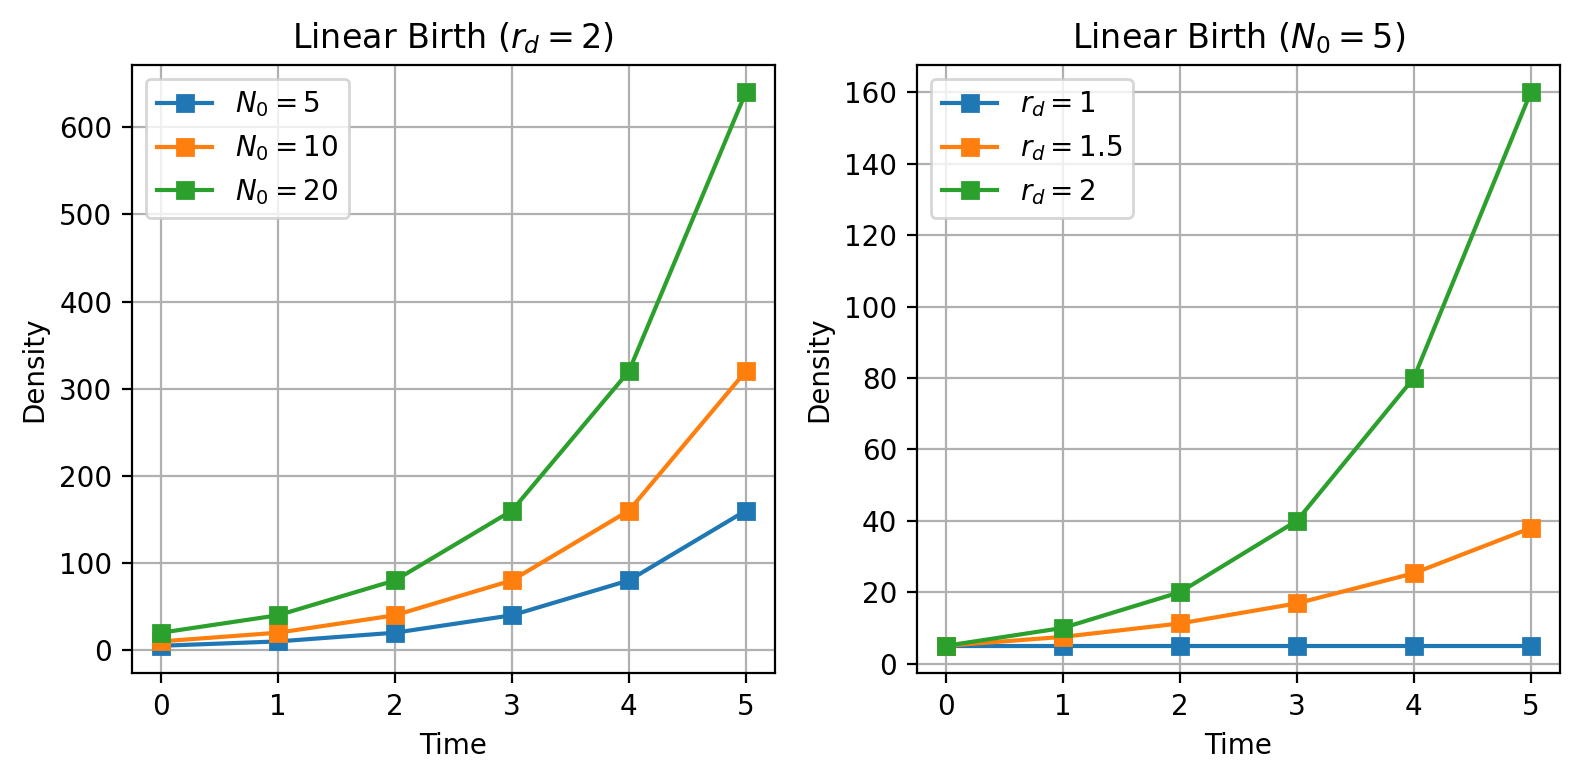

In [14]:
times = [i for i in range(5+1)]

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

r_d = 2
ax1.set_title(rf"Linear Birth ($r_d = {r_d}$)")
ax1.set_xlabel("Time")
ax1.set_ylabel("Density")
n0s = [5, 10, 20]
for n0 in n0s:
    density = sd.discrete_simulation(linear_birth, [n0], [r_d], 5)[0]
    ax1.plot(
        times,
        density,
        marker="s",
        label=rf"$N_0 = {n0}$",
    )
ax1.legend()
ax1.grid()

N_0 = 5
ax2.set_title(rf"Linear Birth ($N_0 = {N_0}$)")
ax2.set_xlabel("Time")
ax2.set_ylabel("Density")
rates = [1, 1.5, 2]
for rd in rates:
    density = sd.discrete_simulation(linear_birth, [N_0], [rd], 5)[0]
    ax2.plot(
        times,
        density,
        marker="s",
        label=rf"$r_d = {rd}$",
    )
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

### Linear Birth/Death

In order to more complexity is possible to model also deaths by adding a
**death rate** ($s_d$), that is fraction of the total population
($0 \leq s_d \leq 1$). Now the formula becomes

$$N_{t+1} = r_d \cdot N_t - s_d \cdot N_t$$

that can be rewritten as

$$N_{t+1} = (r_d - s_d) \cdot N_t = \alpha_d \cdot N_t$$

obtaining $\alpha_d$ that is greater or equal to zero.


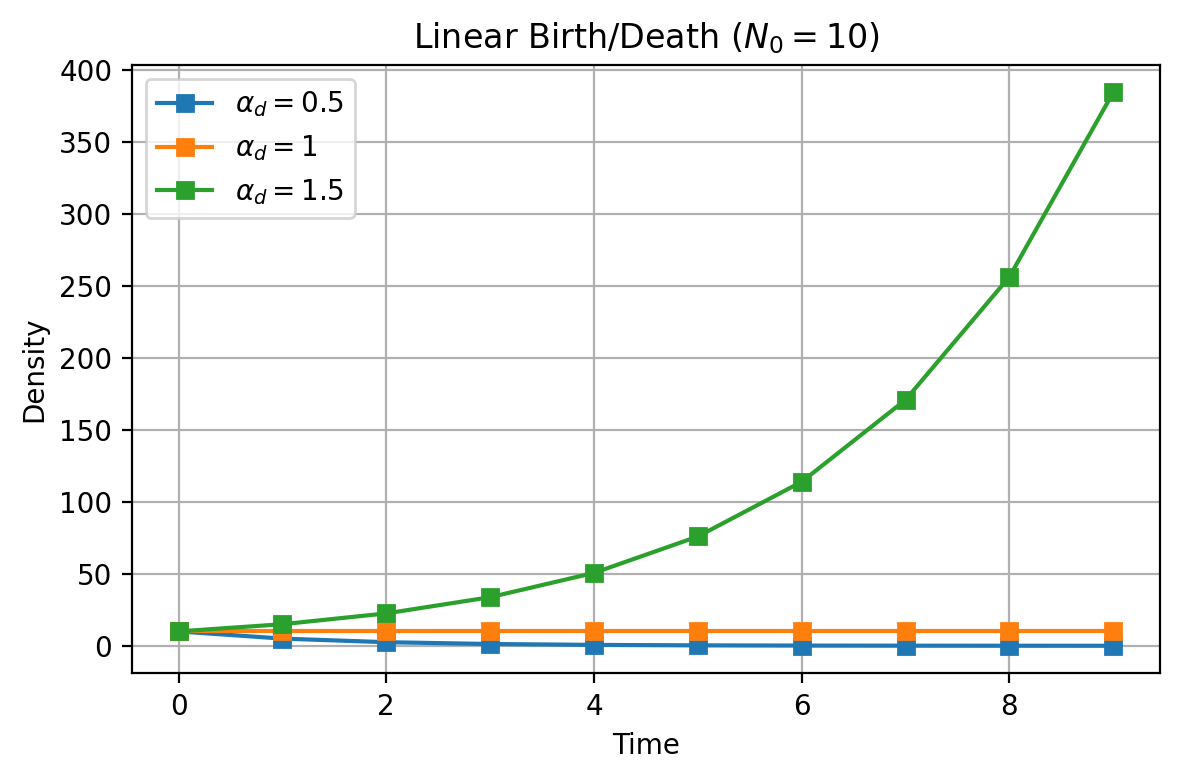

In [ ]:
times = [i for i in range(10)]

plt.figure(figsize=(6, 4), dpi=200)

N_0 = 10
plt.title(rf"Linear Birth/Death ($N_0 = {N_0}$)")
plt.xlabel("Time")
plt.ylabel("Density")
alphas = [0.5, 1, 1.5]
for alpha in alphas:
    plt.plot(
        times,
        [linear_birth(N_0, alpha, t) for t in times],
        marker="s",
        label=rf"$\alpha_d = {alpha}$",
    )
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Migration

Another step consists in the introduction of a **migration factor**, that
models a constant individual income. The formula is

$$N_{t+1} = \alpha_d \cdot N_t + \beta$$

where $\beta$ is a positive number.


In [ ]:
def migration(n0, alpha, beta, t):
    if t == 0:
        return n0
    return alpha * migration(n0, alpha, beta, t - 1) + beta


Let's run some simulations and we can see that in some cases we arrive at an
_equilibrium point_.


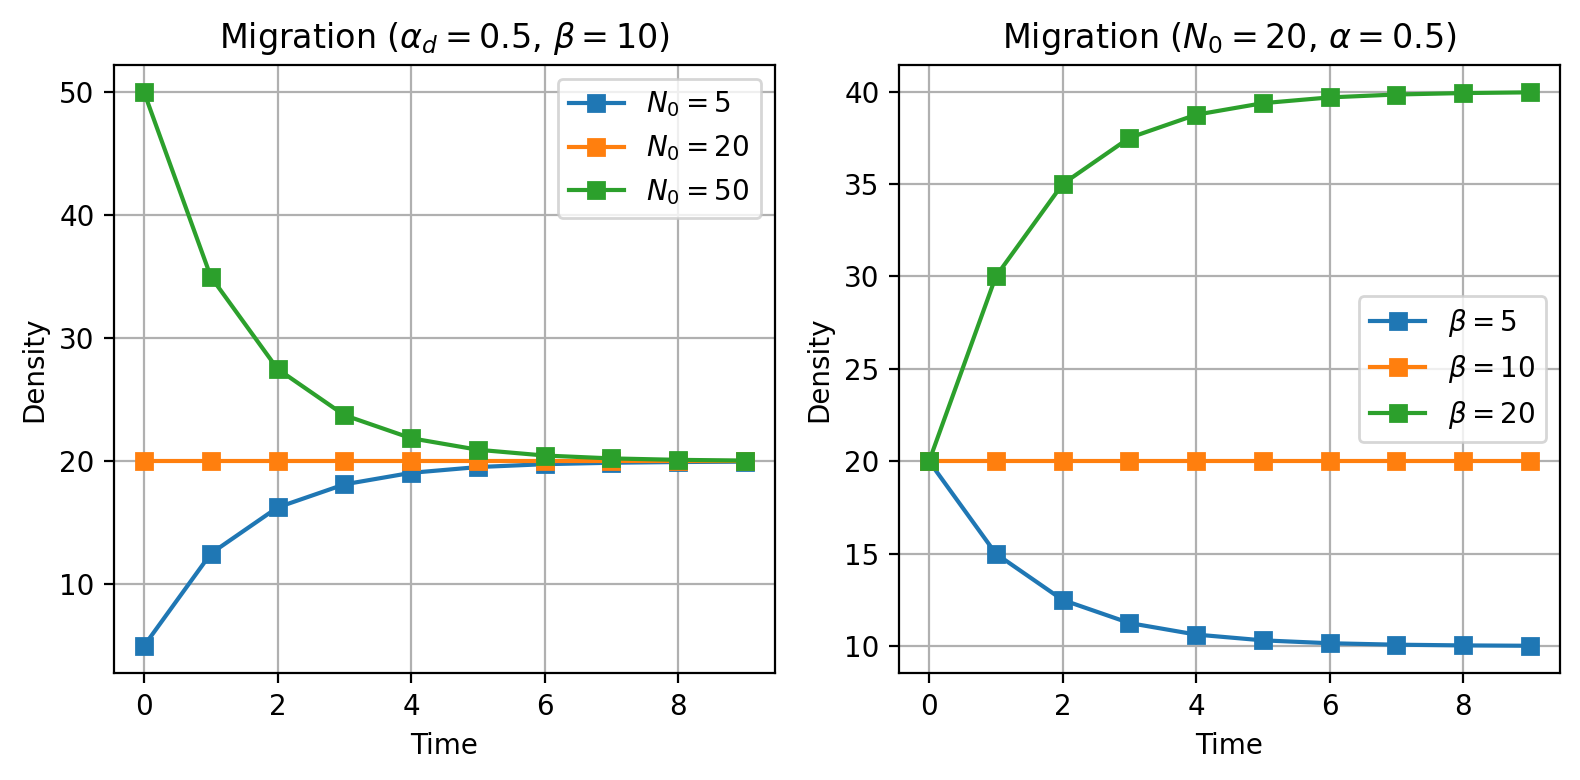

In [ ]:
times = [i for i in range(10)]

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

alpha = 0.5
beta = 10
ax1.set_title(rf"Migration ($\alpha_d = {alpha}$, $\beta = {beta}$)")
ax1.set_xlabel("Time")
ax1.set_ylabel("Density")
n0s = [5, 20, 50]
for n0 in n0s:
    ax1.plot(
        times,
        [migration(n0, alpha, beta, t) for t in times],
        marker="s",
        label=rf"$N_0 = {n0}$",
    )
ax1.legend()
ax1.grid()

N_0 = 20
ax2.set_title(rf"Migration ($N_0 = {N_0}$, $\alpha = {alpha}$)")
ax2.set_xlabel("Time")
ax2.set_ylabel("Density")
betas = [5, 10, 20]
for beta in betas:
    ax2.plot(
        times,
        [migration(N_0, alpha, beta, t) for t in times],
        marker="s",
        label=rf"$\beta = {beta}$",
    )
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

## Interactions

Let's start introduce more complex dynamics like interactions between
individuals, by introducing the **resource-consumer** model that is a
**non linear** model.

In this model we introduce the _logistic equation_ by adding a new constant $K$
that represents the **carrying capacity**.

$$N_{t+1} = r_d \cdot N_t \left( 1 - \frac{N_t}{K} \right)$$

where $\frac{N_t}{K}$ is called **ratio of occupancy**.


In [ ]:
def logistic(n0, rate, k, t):
    if t == 0:
        return n0

    n_t = logistic(n0, rate, k, t - 1)
    occupancy = n_t / k
    return rate * n_t * (1 - occupancy)

Let's run some simulations with different values of $K$.


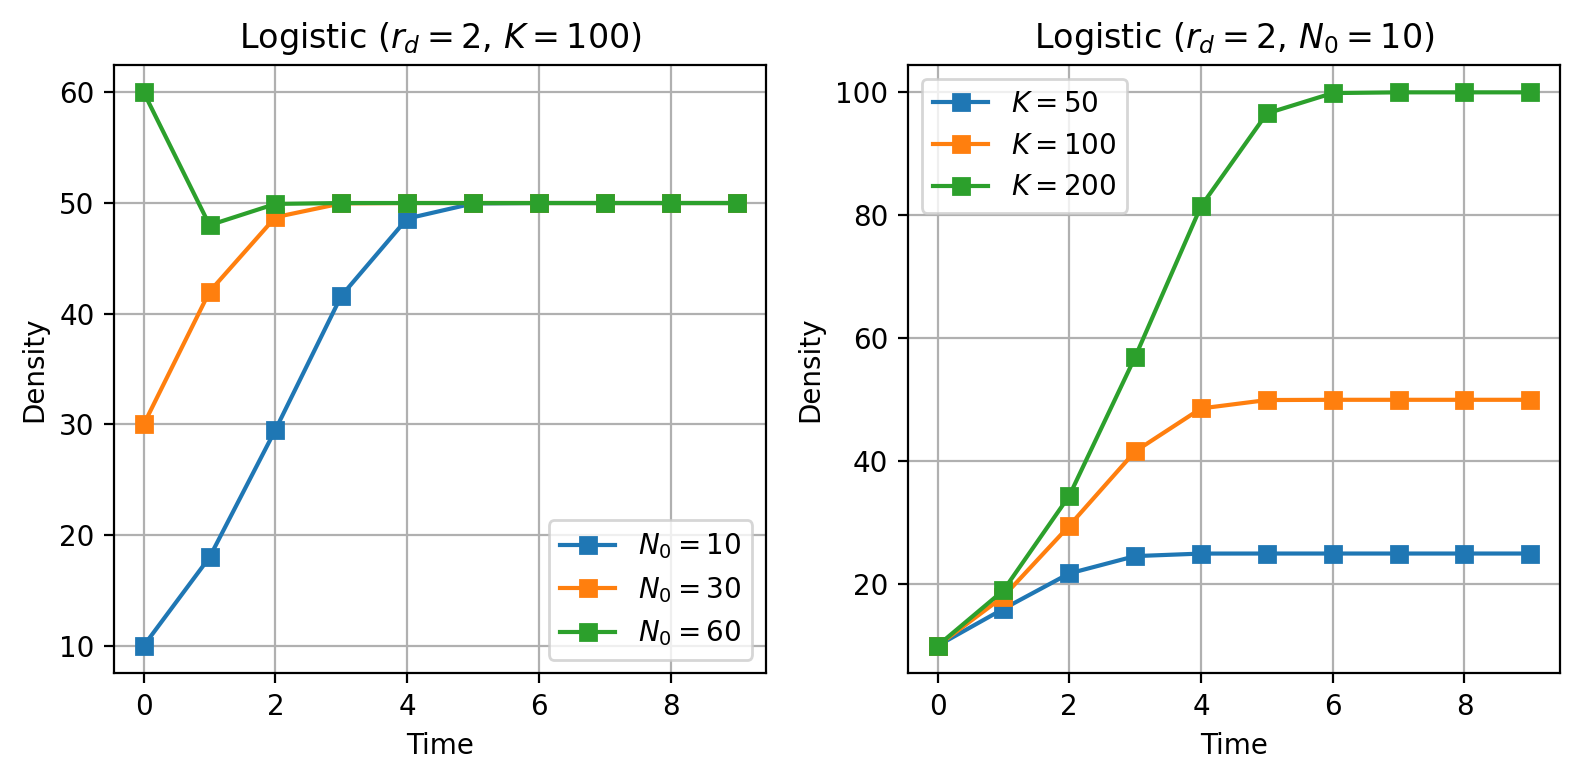

In [ ]:
times = [i for i in range(10)]

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

rate = 2
k = 100
ax1.set_title(rf"Logistic ($r_d = {rate}$, $K = {k}$)")
ax1.set_xlabel("Time")
ax1.set_ylabel("Density")
n0s = [10, 30, 60]
for n0 in n0s:
    ax1.plot(
        times,
        [logistic(n0, rate, k, t) for t in times],
        marker="s",
        label=rf"$N_0 = {n0}$",
    )
ax1.legend()
ax1.grid()

N_0 = 10
ax2.set_title(rf"Logistic ($r_d = {rate}$, $N_0 = {N_0}$)")
ax2.set_xlabel("Time")
ax2.set_ylabel("Density")
ks = [50, 100, 200]
for k in ks:
    ax2.plot(
        times,
        [logistic(N_0, rate, k, t) for t in times],
        marker="s",
        label=rf"$K = {k}$",
    )
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()